# Memo for Concrete Strength Prediction

In [89]:
#!pip install ipython

In [1]:
# Import the libraries 
#!pip install scikit-learn==0.22.2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy.stats import zscore
from sklearn import mixture
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
#from Ipython.display import Image
#from Ipython.display import display
from IPython.display import display, Image
import pydotplus as pydot
from sklearn import tree
from os import system
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
concrete_df = pd.read_csv("Concrete.csv")

# EDA

In [3]:
len(concrete_df)

1030

In [4]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
actual_strength=concrete_df.strength 

<AxesSubplot:xlabel='strength'>

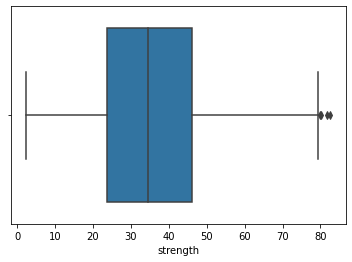

In [8]:
sns.boxplot(actual_strength)

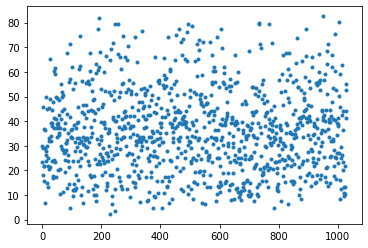

In [9]:
plt.plot(concrete_df.strength,'.')

In [10]:
strength_by_age=concrete_df.groupby("age")["strength"].describe().reset_index()

<AxesSubplot:xlabel='age', ylabel='max'>

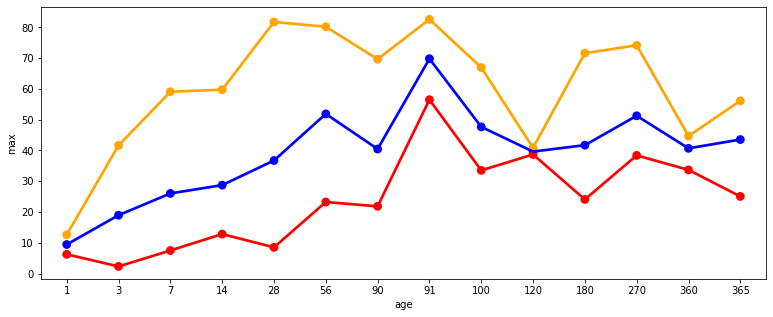

In [11]:
fig=plt.figure(figsize=(13,5))
sns.pointplot(x='age',y='mean',data=strength_by_age, color='blue')
sns.pointplot(x='age',y='min',data=strength_by_age, color='red')
sns.pointplot(x='age',y='max',data=strength_by_age, color='orange')

The Abrams water-to-cement ratio(w/c) pronouncement of 1918 has been described as the most useful and significant advancement in the history of concrete technology. His most important formualtion was the inverse proportionality between the w/c ratio and the strength of concrete. 

The generally accepted Abrams rule is a formulation of the obsevation that an increase in the w/c decreases the concrete strength, whereas a decrease in the w/c ratio increases the strength. The implication, therefore, is that the strength of various but comparable concrete are identical as long as their w/c ratios remain the same, regardless of the details of the compositions. The Abrams rule implies that only the quality of the cement paste controls the strength of comparable cement. 

In [12]:
concrete_df['water_cement']=concrete_df['cement']/concrete_df['water']

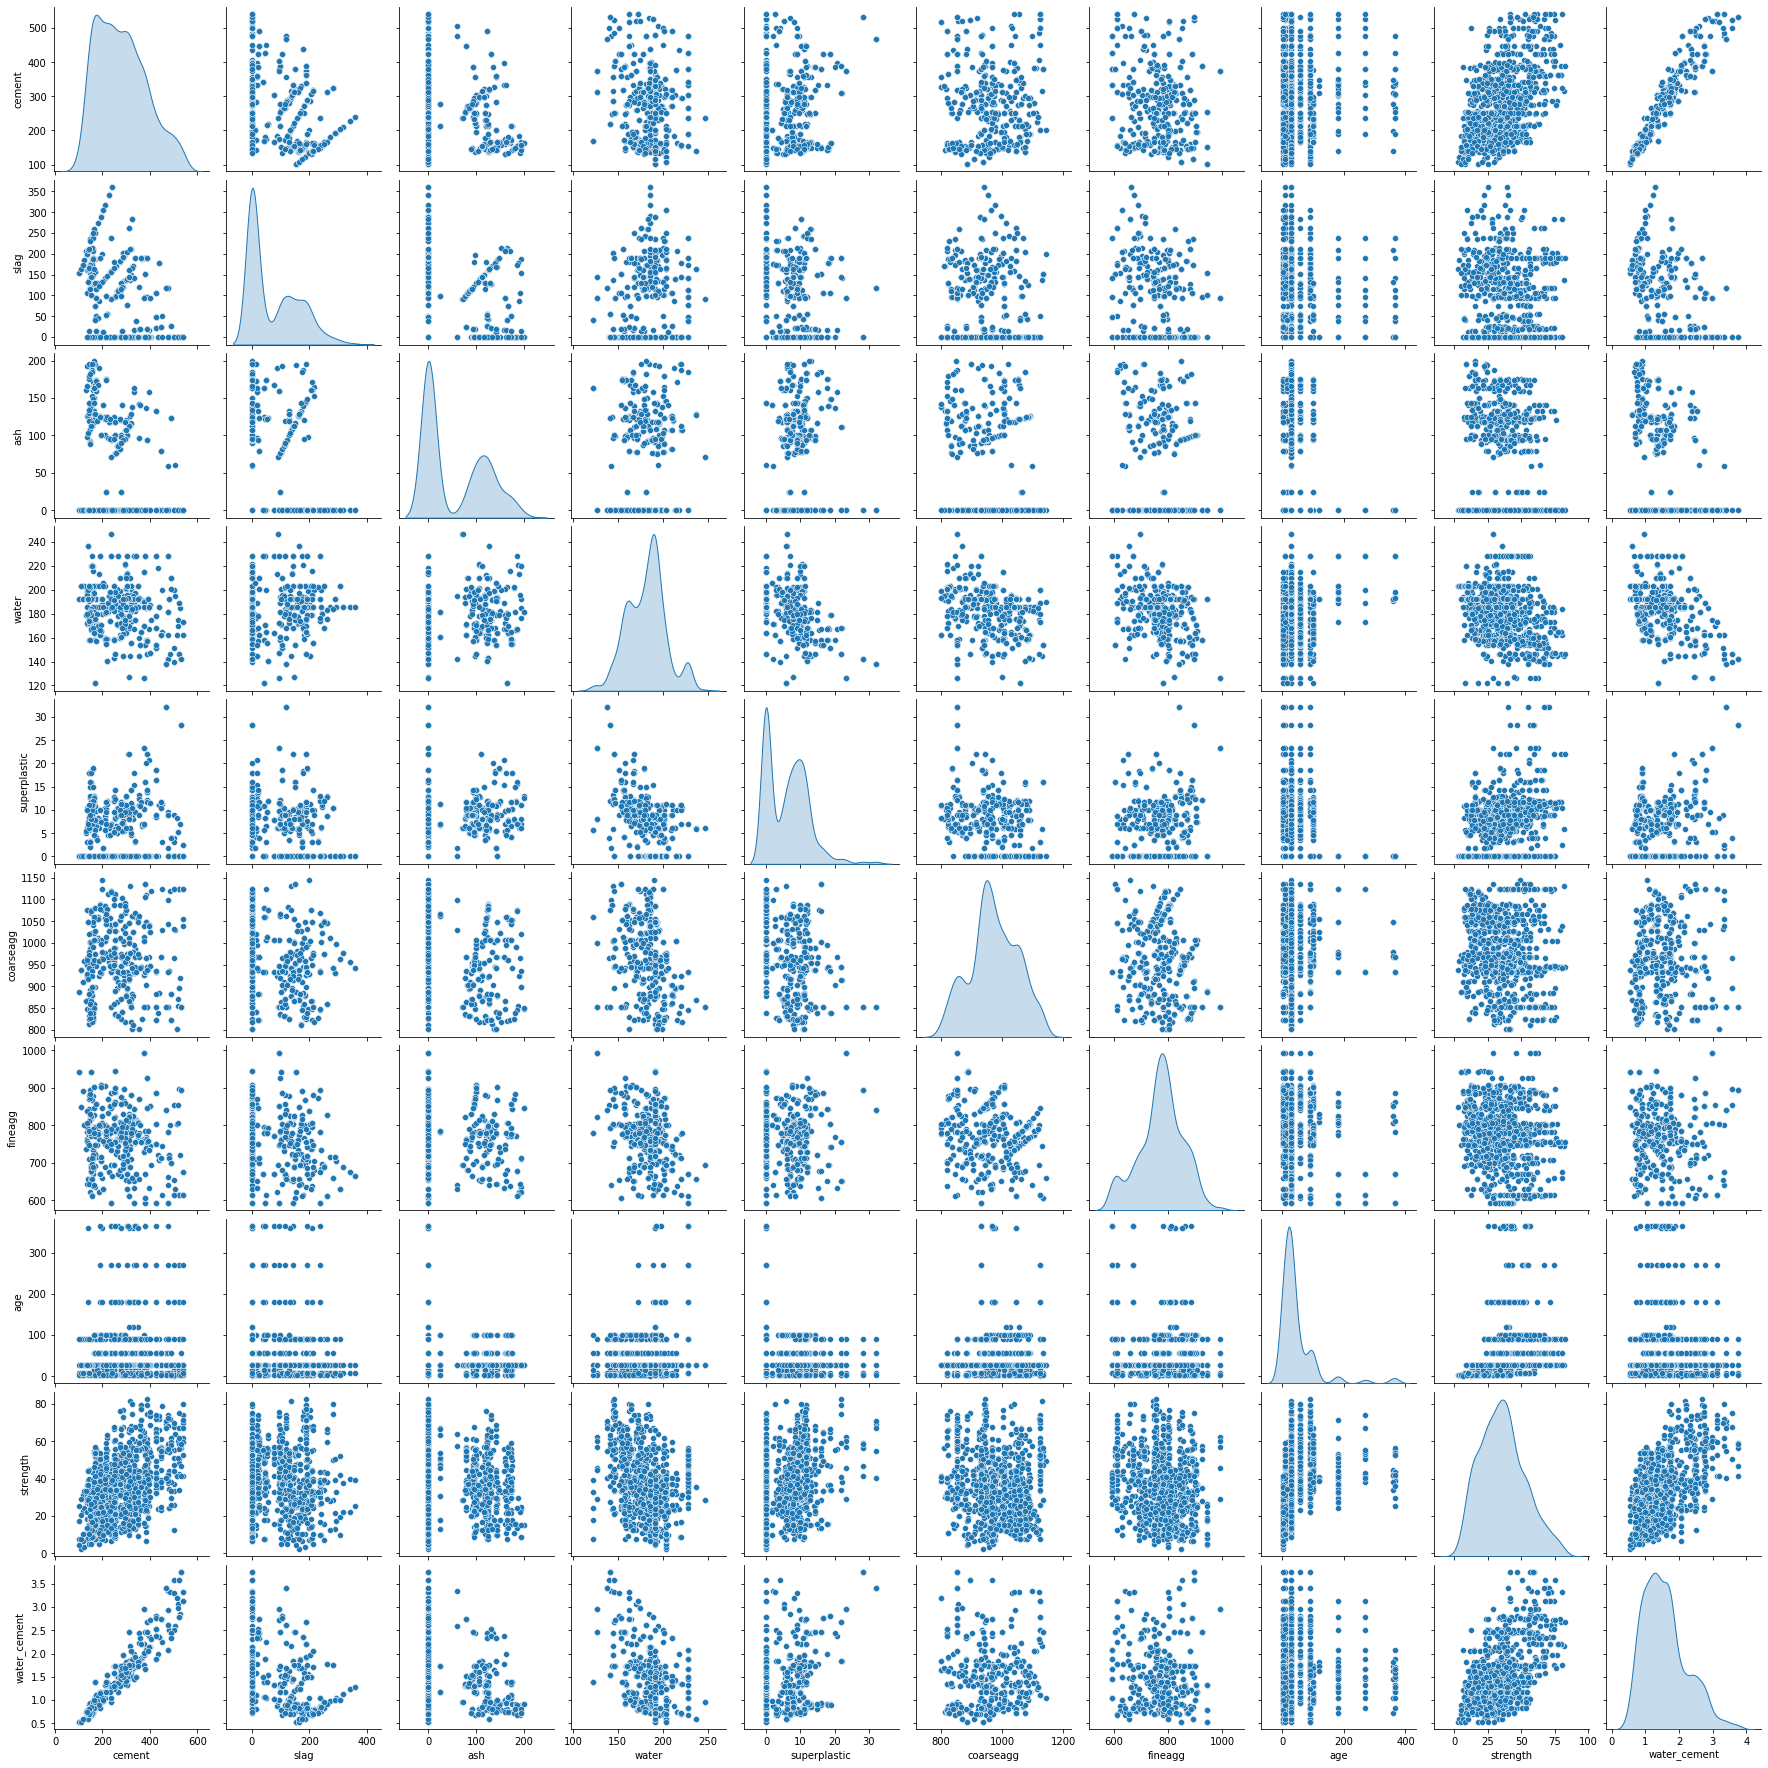

In [13]:
#Pairplot using sns
sns.pairplot(concrete_df,diag_kind='kde')

In [14]:
clf=mixture.BayesianGaussianMixture(n_components=3,covariance_type='full')
clf.fit(concrete_df.coarseagg.values.reshape(-1,1))

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [15]:
concrete_df['coarseagg_gaussian']=clf.predict([[i] for i in concrete_df.coarseagg.values])

In [16]:
concrete_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement,coarseagg_gaussian
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0.694349,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1.066961,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1.334045,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.166667,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0.800828,2
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,0.750000,1
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,3.746827,0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,1.500000,1


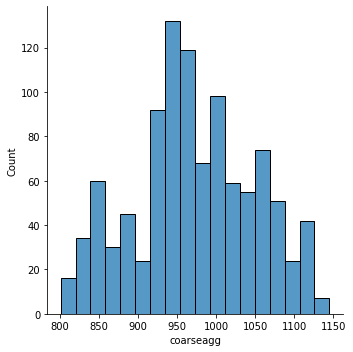

In [17]:
sns.displot(concrete_df.coarseagg)

<AxesSubplot:xlabel='coarseagg', ylabel='Density'>

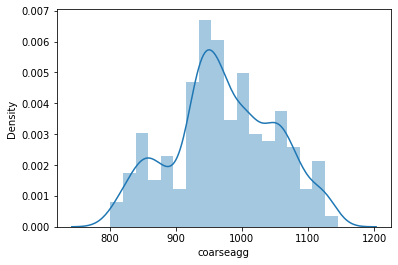

In [18]:
sns.distplot(concrete_df.coarseagg)

<AxesSubplot:xlabel='coarseagg', ylabel='Density'>

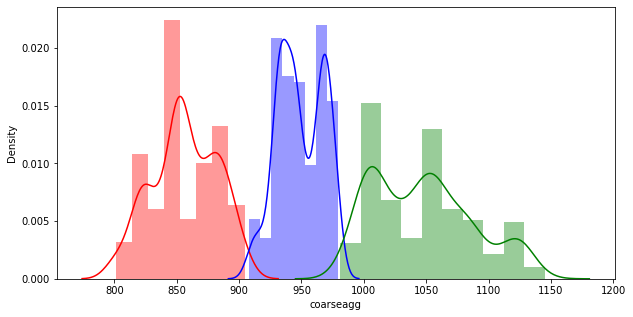

In [19]:
fig=plt.figure(figsize=(10,5))
sns.distplot(concrete_df[concrete_df['coarseagg_gaussian']==0].coarseagg, color='red')
sns.distplot(concrete_df[concrete_df['coarseagg_gaussian']==1].coarseagg, color='blue')
sns.distplot(concrete_df[concrete_df['coarseagg_gaussian']==2].coarseagg, color='green')

In [20]:
concrete_df_z=concrete_df
concrete_df_z[concrete_df.columns[:-1]]=concrete_df[concrete_df.columns[:-1]].apply(zscore)
#to convert values to Z score to remove different units

In [21]:
concrete_df_z=pd.DataFrame(concrete_df_z, columns=concrete_df.columns)
concrete_df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement,coarseagg_gaussian
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,-1.364534,1
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.789327,2
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.377027,1
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,-0.635411,1
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,-1.200161,2


# Modeling

In [22]:
x=concrete_df_z.drop(labels="strength", axis=1)
y=concrete_df_z[['strength']]

In [23]:
X_train,X_test, y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [24]:
dt_model=DecisionTreeRegressor()

In [25]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
print(pd.DataFrame(dt_model.feature_importances_, columns=["Imp"],index=X_train.columns))

                         Imp
cement              0.016917
slag                0.085474
ash                 0.019872
water               0.033997
superplastic        0.019045
coarseagg           0.021515
fineagg             0.032779
age                 0.371248
water_cement        0.398489
coarseagg_gaussian  0.000663


In [27]:
dt_model.score(X_train,y_train)

0.9948592392987249

In [28]:
dt_model.score(X_test,y_test)

0.8598974182178467

In [29]:
#Drop low value columns

In [30]:
drop_cols=['ash','coarseagg','fineagg','superplastic','strength','coarseagg_gaussian']
x=concrete_df_z.drop(labels=drop_cols,axis=1)

In [31]:
X_train,X_test, y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [32]:
dt_model=DecisionTreeRegressor(min_samples_leaf=20)

In [33]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
print(pd.DataFrame(dt_model.feature_importances_, columns=["Imp"],index=X_train.columns))

                   Imp
cement        0.013561
slag          0.079839
water         0.019542
age           0.432421
water_cement  0.454637


In [35]:
dt_model.score(X_train,y_train)

0.8203095202088906

In [36]:
dt_model.score(X_test,y_test)

0.7781390201528581

In [37]:
Credit_Tree_File=open('./concrete_tree.dot','w')
dot_data=tree.export_graphviz(dt_model,out_file=Credit_Tree_File,feature_names=list(X_train))
Credit_Tree_File.close()

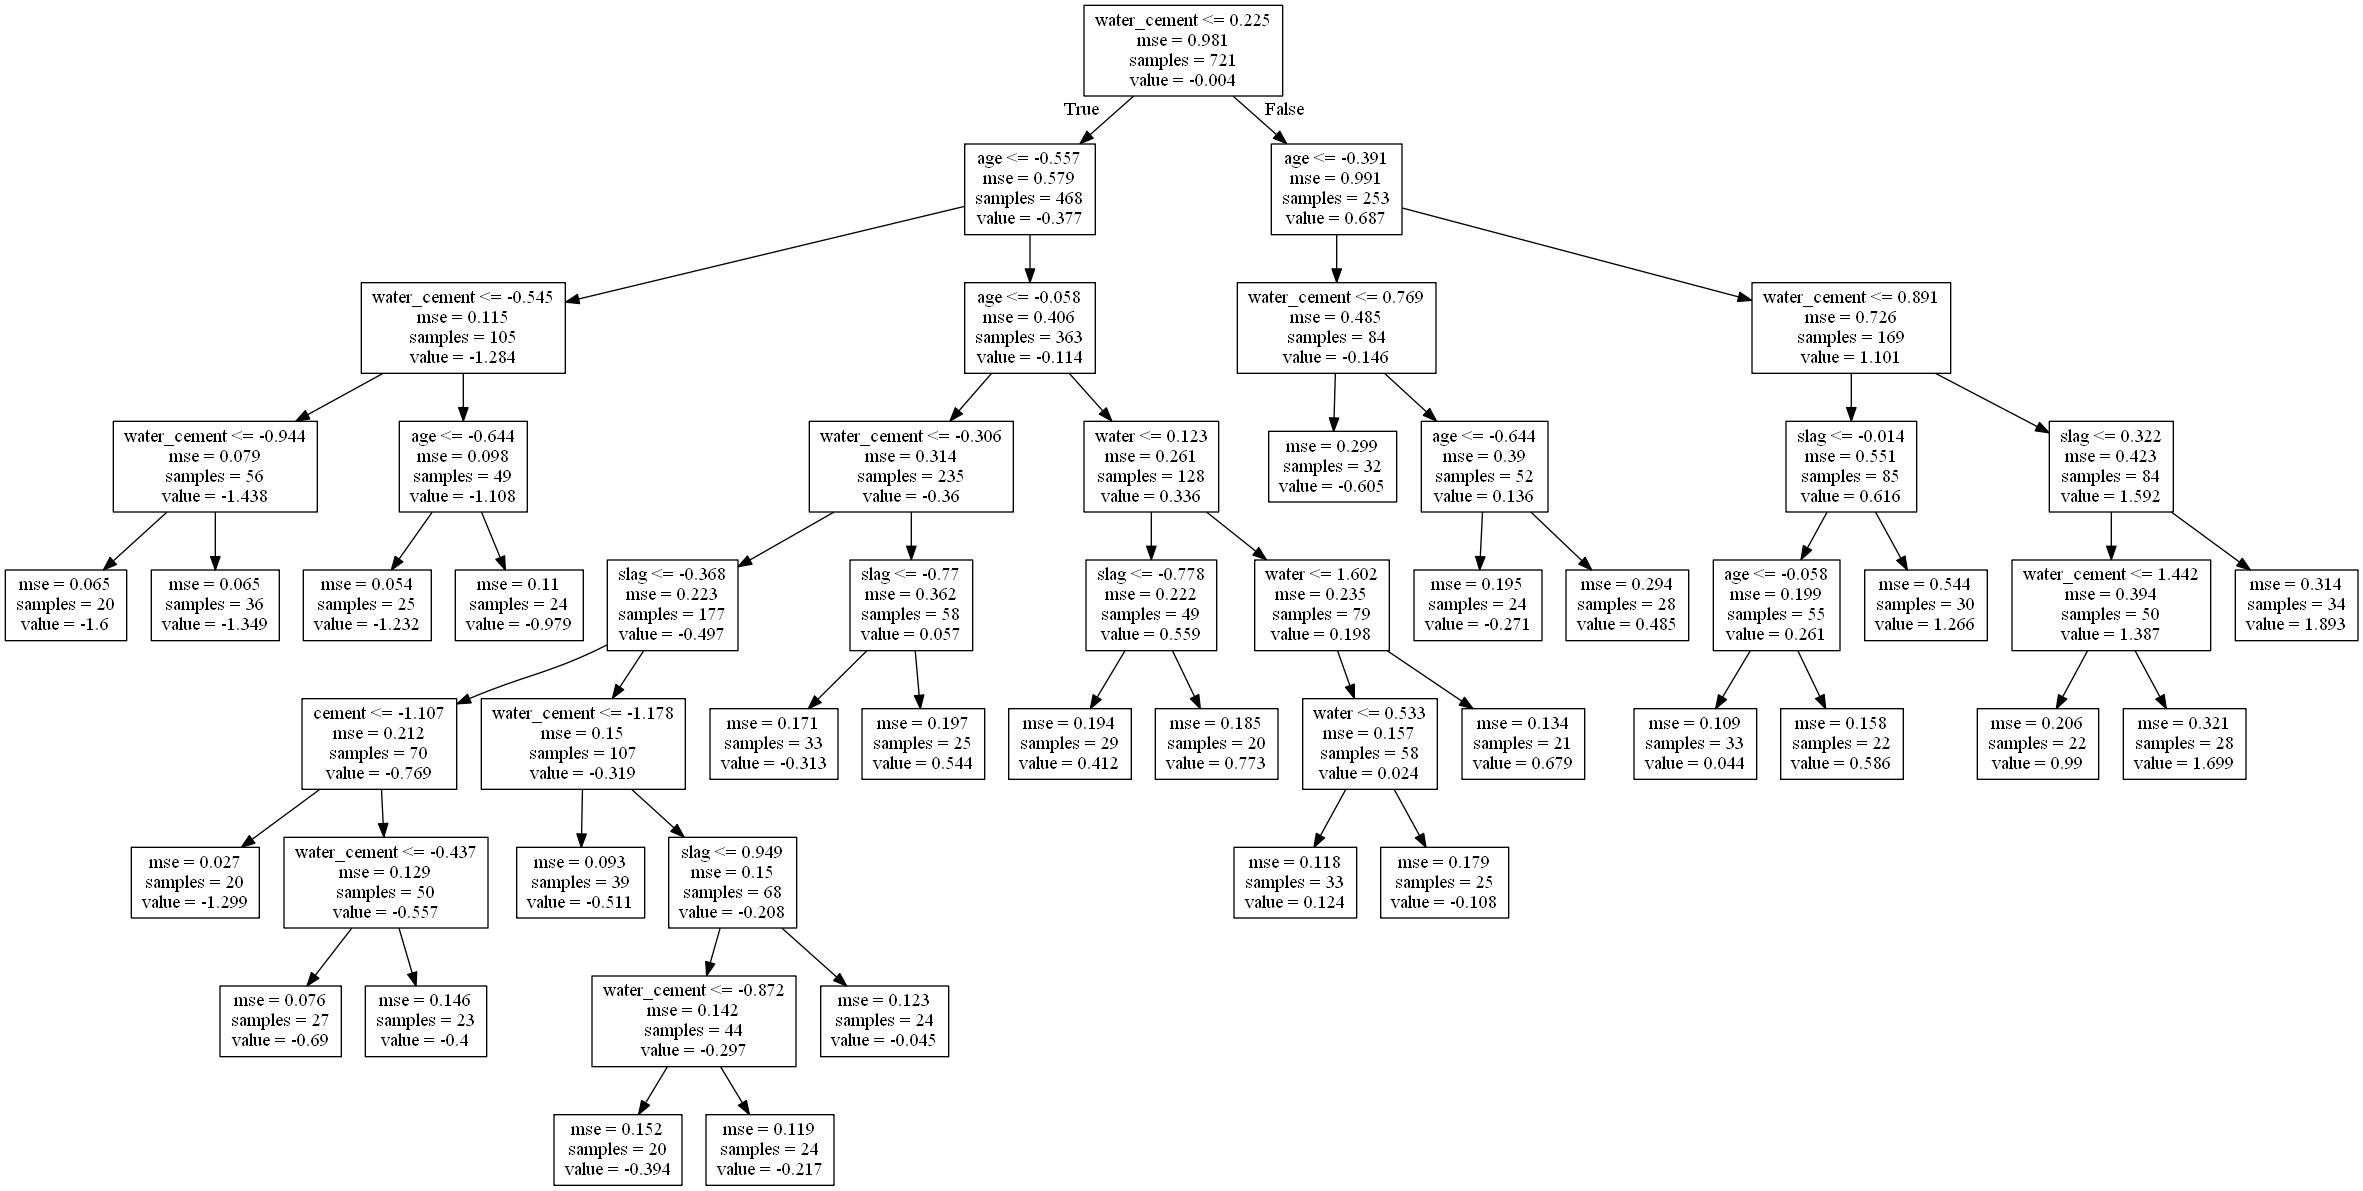

In [38]:
#You can also copy the script in the .dot file and past it at http://webgraphviz.com/ to get tree view
#or create a .png as below

system("dot -Tpng ./concrete_tree.dot -o ./concrete_tree.png")
Image("./concrete_tree.png")

In [39]:
# Ensemble Techniques

In [40]:
gbmTree=GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training",gbmTree.score(X_train,y_train))
print("gbmTree on test data",gbmTree.score(X_test,y_test))

gbmTree on training 0.9051151186463059
gbmTree on test data 0.8596184229505883


In [41]:
bgcl=BaggingRegressor(n_estimators=100, oob_score=True)
bgcl.fit(X_train,y_train)
print("bgcl on train data",bgcl.score(X_train,y_train))
print("bgcl on test data",bgcl.score(X_test,y_test))

bgcl on train data 0.9798270096456227
bgcl on test data 0.8923293667717255


In [42]:
rfTree=RandomForestRegressor(n_estimators=100)
rfTree.fit(X_train,y_train)
print("rfTree on train data",rfTree.score(X_train,y_train))
print("rfTree on test data",rfTree.score(X_test,y_test))

rfTree on train data 0.9797711042722516
rfTree on test data 0.8909333946262881


In [43]:
concrete_XY=x.join(y)

In [44]:
#configure bootstrap
values=concrete_XY.values
n_iterations=1000 # number of bootstrap samples to create
n_size=int(len(concrete_df_z)*1) #size of a bootstarp sample

#run bootstrap
stats=list() #empty list that will hold the score for each bootstrap iteration
for i in range(n_iterations):
    #prepare ytain and test sets
    train=resample(values,n_samples=n_size)   #sampling with replacement
    test=np.array([x for x in values if x.tolist() not in train.tolist()]) #picking rest of the data not considered in sample
    #fit model
    gbmTree=GradientBoostingRegressor(n_estimators=50)
    gbmTree.fit(train[:,:-1], train[:,-1]) #fit against independent variables and correcponding target values
    y_test2=test[:,-1] #Take the target column for all rows in test set
    
    #evaluate model
    predictions=gbmTree.predict(test[:,:-1]) #predict based on independent varaibles in the test data
    score=gbmTree.score(test[:,:-1], y_test2)
    
    stats.append(score)
    

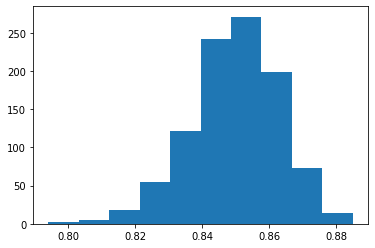

95.0 confidence interval 82.2% and 87.2%


In [45]:
#plot score

plt.hist(stats)
plt.show()

#Confidence intervals
alpha=0.95               # for 95% confidence
p=((1.0-alpha)/2.0)*100   #tail regions on right and left .26 on each side indicated by p value(border)
lower=max(0.0,np.percentile(stats,p))
p=((alpha + (1.0-alpha)/2.0)) *100
upper=min(1.0,np.percentile(stats,p))
print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100,lower*100, upper*100))

In [46]:
#configure bootstrap

n_iterations=1000 # number of bootstrap samples to create
n_size=int(len(concrete_df_z)*1) #size of a bootstarp sample

#run bootstrap
stats=list() #empty list that will hold the score for each bootstrap iteration
for i in range(n_iterations):
    #prepare ytain and test sets
    train=resample(values,n_samples=n_size)   #sampling with replacement
    test=np.array([x for x in values if x.tolist() not in train.tolist()]) #picking rest of the data not considered in sample
    
    #fit model
    rfTree=RandomForestRegressor(n_estimators=100)
    rfTree.fit(train[:,:-1], train[:,-1]) #fit against independent variables and correcponding target values
    
    rfTree.fit(train[:,:-1], train[:,-1]) #fit against independent variables and correcponding target values
    y_test2=test[:,-1] #Take the target column for all rows in test set
    
    #evaluate model
    predictions=rfTree.predict(test[:,:-1]) #predict based on independent varaibles in the test data
    score=rfTree.score(test[:,:-1], y_test2)
    
    stats.append(score)

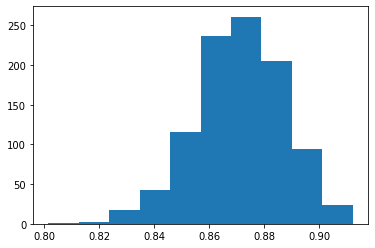

95.0 confidence interval 83.6% and 90.1%


In [47]:
#plot score

plt.hist(stats)
plt.show()

#Confidence intervals
alpha=0.95               # for 95% confidence
p=((1.0-alpha)/2.0)*100   #tail regions on right and left .26 on each side indicated by p value(border)
lower=max(0.0,np.percentile(stats,p))
p=((alpha + (1.0-alpha)/2.0)) *100
upper=min(1.0,np.percentile(stats,p))
print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100,lower*100, upper*100))

# Model Turning using hyper parameters

In [48]:
rf=RandomForestRegressor(random_state=1)

In [49]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [50]:
print(np.linspace(start=5,stop=10,num=2))

[ 5. 10.]


In [51]:
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10,stop=15,num=2)] #returns evenly spaced 10 numbers
#Number of features to consider at every split
max_features=['auto','sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,10, num=2)] #returns evenly spaced numbers can be changd to any
max_depth.append(None)
#Minimum number of sample required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4]
#Method of selecting samples for training each tree
bootstrap=[True,False]

#Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [54]:
#use the random grid to search for the best hyperparameters
#Random search of parameters, using 3 fold cross validation,
#search across 100 different combinations, and use all avaialble cores
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                            n_iter=5,scoring='neg_mean_absolute_error',cv=3,verbose=2,random_state=42,n_jobs=-1,return_train_score=True)
#fit the random search model
rf_random.fit(X_train,y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    3.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.6s finished


In [55]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [56]:
best_random=rf_random.best_estimator_
best_random.score(X_test,y_test)

0.892951574854579

In [57]:
#This is the best the randomizedserachCV could do given the range of values we submitted. It probably got stuick in 
#suboptimal combination of hyper parameters and that is why it's result is lesser than the randomforest regressor earlier

# GridSearchCV

In [62]:
param_grid={
    'bootstrap':[True],
    'max_depth':[5,6],
    'max_features':[2,3],
    'min_samples_leaf':[3,4],
    'min_samples_split':[5,10],
    'n_estimators': [5,6,7]
}

In [64]:
rf=RandomForestRegressor(random_state=1)

In [66]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,
                        cv=3,n_jobs=1,verbose=0,return_train_score=True)

In [67]:
#Fit the grid search to the data
grid_search.fit(X_train,y_train);

In [68]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 7}

In [69]:
best_grid=grid_search.best_estimator_
best_grid.score(X_test,y_test)

0.8394552425933958

In [ ]:
#the accuracy is relatively lower as we have severly restricted the hyper parameter ranges. This was done to minimize the
# execution time.